In [ ]:
! pip install numpy scipy matplotlib seaborn numpyro jax

# Brief Introduction to MCMC

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy
import scipy.stats as stats


# for reproducibility
# np.random.seed(0)

# Intro to MCMC: Metropolis-Hasting (MH) algorithm
This is one simple MCMC algorithm that we can implement in a few lines of code. 


We have a continuous density $p(x)$ from which we want to draw samples $X_1, X_2, \dots, X_s$. So $p(x)$ is the **target density**. But we only know $p(x)$ up to a proprotionality constant. Meaning, we have a function $h(x) \propto p(x)$ that we can evaluate. 

The ideas is that we set up a Markov Chain whose stationary distribution is precisely $p(x)$. The transition probability of this Markov Chain is governed by a **proposal distribution** $g(x)$. 


TODO: Complete description of MH. 


In [40]:
def normal_mixture_density(x, mixture_coef=0.3, locs=(-2, 2), scales=(1, 1)): # target density function
    return (
        mixture_coef * stats.norm.pdf(x, loc=locs[0], scale=scales[0]) 
        + (1 - mixture_coef) * stats.norm.pdf(x, loc=locs[1], scale=scales[1])
    )

def metropolis_hastings(target, proposal, proposal_draw, num_samples, start_position):
    # initialise chain
    current_position = start_position
    samples = []
    while len(samples) < num_samples:
        # draw a candidate position from the proposal distribution
        proposed_position = proposal_draw(current_position)
        
        # compute the Metropolis-Hastings acceptance ratio
        mh_ratio = (
            target(proposed_position) * proposal(current_position, proposed_position) / 
            (target(current_position) * proposal(proposed_position, current_position))
        )


        # decide whether to accept the candidate position
        p_accept = min(1, mh_ratio)
        if np.random.rand() < p_accept:
            # if accept, jump to proposed position
            current_position = proposed_position
        samples.append(current_position)
    return np.array(samples)


def plot_mcmc(samples)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    x = np.linspace(-10, 10, 500)
    y = target(x)
    ax[0].hist(samples, bins=30, density=True, alpha=0.5, label='MH samples')
    ax[0].plot(x, y, label='target distribution')
    ax[0].legend(loc='best')

    # trace plot
    ax[1].plot(samples)
    return fig, ax

# 1D example

Try: 
 - `mixture_coef=0.3, locs=(-2, 1), init=0.0, proposal_std=1.0` with `num_mcmc_samples=100, 1000, 10000`
 - `mixture_coef=0.3, locs=(-2, 4), init=0.0, proposal_std=1.0`
 - `mixture_coef=0.3, locs=(-2, 4), init=0.0, proposal_std=0.5`
 - `mixture_coef=0.3, locs=(-2, 4), init=0.0, proposal_std=0.1`
 - `mixture_coef=0.3, locs=(-2, 1), init=-80, proposal_std=1.0`

Num MCMC samples: 20000


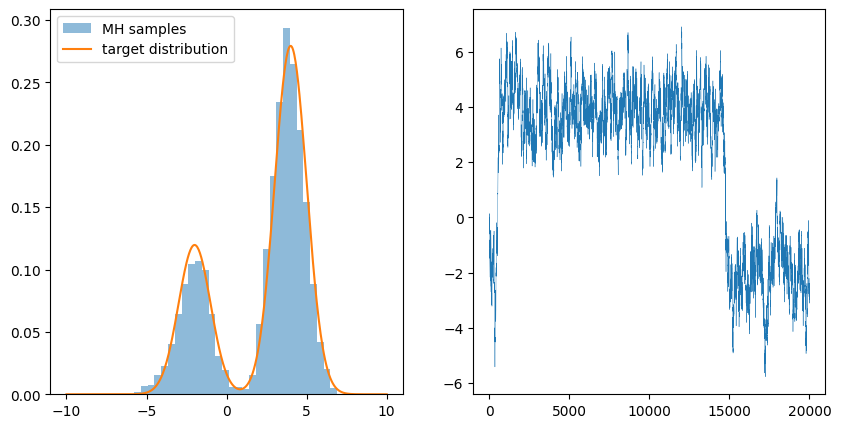

In [107]:
# Configuring MCMC
PROPOSAL_STD = 0.2
TARGET_LOCS = (-2, 4)
TARGET_MIXTURE_COEF = 0.3
INIT_POINT = 0.0

proposal = lambda x, x_next : stats.norm.pdf(x_next, loc=x, scale=PROPOSAL_STD)
proposal_draw = lambda x : np.random.normal(loc=x, scale=PROPOSAL_STD)
target = lambda x: normal_mixture_density(x, mixture_coef=TARGET_MIXTURE_COEF, locs=TARGET_LOCS)

num_mcmc_samples = 20000
thinning = 1
burn = 0


# generate samples using the Metropolis-Hastings algorithm
samples = metropolis_hastings(target, proposal, proposal_draw, num_mcmc_samples, INIT_POINT)
samples = samples[np.arange(burn, len(samples), thinning).astype(int)]
print(f"Num MCMC samples: {len(samples)}")

# plot the histogram of samples and the target distribution
x = np.linspace(-10, 10, 500)
y = target(x)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
ax.hist(samples, bins=30, density=True, alpha=0.5, label='MH samples')
ax.plot(x, y, label='target distribution')
ax.legend(loc='best')

# trace plot
ax = axes[1]
ax.plot(samples, linewidth=0.3)

# 2D example
This might just be eye candy for a 2D example. 

You need a trace plot for each dimension.

Text(0.5, 1.0, 'Trace plot for Y')

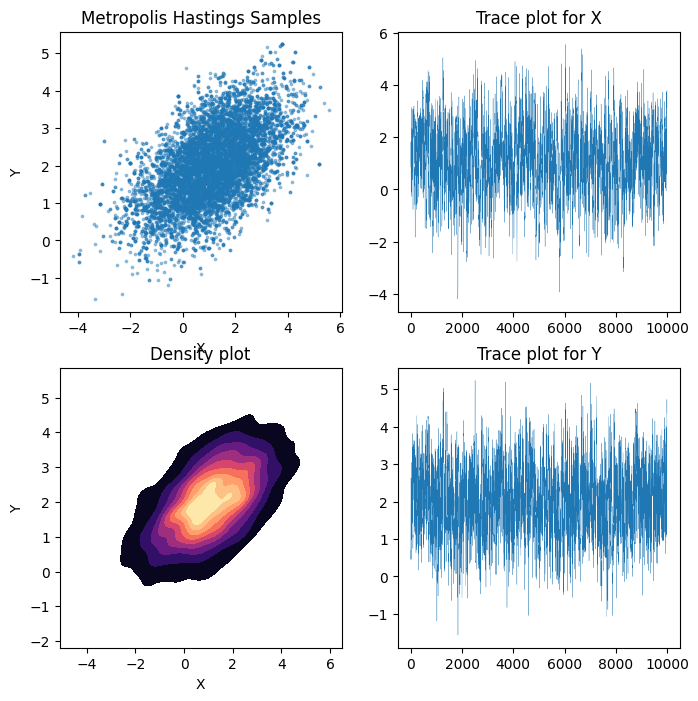

In [75]:
from scipy.stats import multivariate_normal as mvn

# define the target distribution
mu_target = np.array([1, 2])
cov_target = np.array(
    [[2, 0.8], 
     [0.8, 1]]
)
target = lambda x: mvn(mu_target, cov_target).pdf(x)

# define the proposal distribution
proposal_cov = np.array([[1, 0], [0, 1]])
proposal = lambda x, x_next : mvn(x, proposal_cov).pdf(x_next)
proposal_draw = lambda x : np.random.multivariate_normal(x, proposal_cov)

# generate samples
num_mcmc_samples = 10000
start_position = np.array([0, 0])
samples = metropolis_hastings(target, proposal, proposal_draw, num_mcmc_samples, start_position)

# plot the samples
fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes[0][0]
ax.scatter(samples[:, 0], samples[:, 1], s=3, alpha=0.4)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Metropolis Hastings Samples')

ax = axes[1][0]
cmap = matplotlib.colormaps["magma"]
cf = sns.kdeplot(x=samples[:, 0], y=samples[:, 1], cmap=cmap, fill=True, ax=ax)
# norm = matplotlib.colors.Normalize(vmin=np.min(samples), vmax=np.max(samples))
# fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Density plot');

# Trace plots for both variables
ax = axes[0][1]
ax.plot(samples[:, 0], linewidth=0.2)
ax.set_title("Trace plot for X")

ax = axes[1][1]
ax.plot(samples[:, 1], linewidth=0.2)
ax.set_title("Trace plot for Y")

# Other MCMC algorithms
We don't usually use MH for MCMC in practical application. There are other MCMC algorithm or other ways of sampling from a distributions. 

Here's an excellent interactive visualisation of various MCMC algorithm at [Chi Feng's github.io MCMC demo](http://chi-feng.github.io/mcmc-demo/app.html?algorithm=RandomWalkMH&target=banana). 

TODO: List of observations for MCMC algorithms demo. 

# Posterior sampling with MCMC

That's it for a brief introduction to MCMC. It should be enough understanding to start using libraries out there so that we can forget (a lot) of low level implementation details. 

We will introduce `numpyro` today as our Bayesian inference library / engine. 


## 1D linear regression
Let's use `numpyro` to perform posterior sampling on a simple linear regression model: 
$$y = ax + \eta$$ 
where $\eta \sim N(0, \sigma^2)$ is Gaussian observation noise. 




## Using `JAX` + `numpyro`

In [167]:
import jax
import jax.numpy as jnp
import numpyro
import numpyro.distributions as dist
from numpyro.infer import MCMC, NUTS
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


def generate_data(a_true, k, n, xmin, xmax, rng_key):
    rng_key, sub_rng_key = jax.random.split(rng_key)
    x = jax.random.uniform(sub_rng_key, (n,), minval=xmin, maxval=xmax)
    y = jnp.power(a_true, k) * x + jax.random.normal(rng_key, (n,))
    return x, y


def model(x, y, k):
    a = numpyro.sample("a", dist.Normal(0, 1))
    mu = jnp.power(a, k) * x
    with numpyro.plate("data", len(y)):
        numpyro.sample("y", dist.Normal(mu, 1.0), obs=y)

    
def plot_posterior(samples, ax, plot_gaussian=False):
    mu = jnp.mean(samples['a'])
    sigma = jnp.std(samples['a'])
    sns.histplot(samples['a'], kde=True, stat='density', ax=ax)
    title = f'Posterior samples of `$a$` ($\mu=${mu:.2f}, $\sigma=${sigma:.4f})'
    ax.set_title(title)
    if plot_gaussian:
        x = jnp.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        ax.plot(x, stats.norm.pdf(x, mu, sigma), label='Gaussian fit', color='r')
        ymin, ymax = ax.get_ylim()
        ax.vlines([mu], ymin=ymin, ymax=ymax, linestyle="dashed", color="red", label=f"Mean={mu:.4f}")
        ax.legend()
    return title

Exercise:
 - Try different `n`. 
 - Try different `k`. 
 - Try different `a_true`. 

/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/1252383819.py:14: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4)
sample: 100%|███████████████████| 2500/2500 [00:00<00:00, 11816.19it/s, 7 steps of size 6.20e-01. acc. prob=0.90]


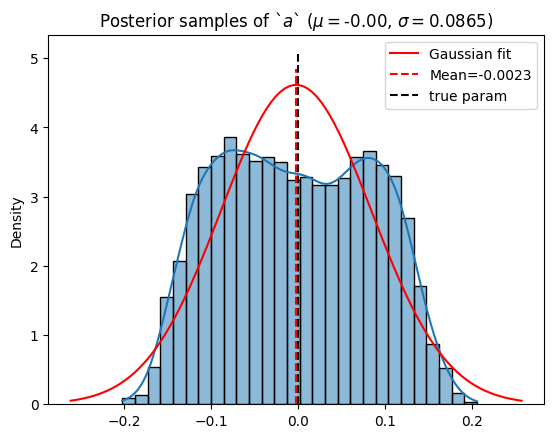

In [168]:
a_true = 0.00
k = 2
n = 1000
xmin = -5
xmax = 5
rng_key = jax.random.PRNGKey(32)

x, y = generate_data(a_true, k, n, xmin, xmax, rng_key)
# plt.plot(x, y, 'kx')
# plt.show()

# MCMC
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4)
mcmc.run(rng_key, x, y, k)
samples = mcmc.get_samples()

fig, ax = plt.subplots(1, 1)
plot_posterior(samples, ax, plot_gaussian=True)
ymin, ymax = ax.get_ylim()
ax.vlines([a_true], ymin=ymin, ymax=ymax, linestyle="dashed", color="black", label="true param")
ax.legend()

# 2D Singular Posterior Example
$$ y = (a^4 - a^2b + b^3) x + \eta$$

Try: 
 - Decrease observational noise spread. 

/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/126882182.py:27: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=3000, num_chains=4, thinning=4)
sample: 100%|███████████████████| 3500/3500 [00:00<00:00, 10519.71it/s, 7 steps of size 3.08e-01. acc. prob=0.81]


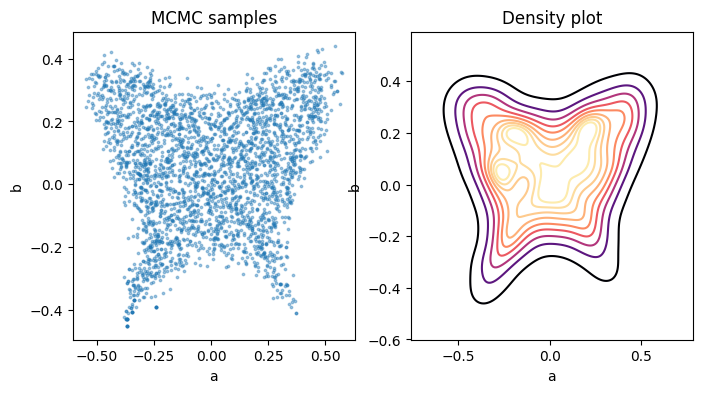

In [234]:
def generate_data(a, b, n, xmin, xmax, rng_key):
    rng_key, sub_rng_key = jax.random.split(rng_key)
    x = jax.random.uniform(sub_rng_key, (n,), minval=xmin, maxval=xmax)
    y = (a**4 - a**2 * b + b**2) * x + jax.random.normal(rng_key, (n,))
    return x, y


def model(x, y, sigma_obs=1.):
    a = numpyro.sample("a", dist.Normal(0, 1))
    b = numpyro.sample("b", dist.Normal(0, 1))
    mu = (a**4 - a**2 * b + b**3) * x
    with numpyro.plate("data", len(y)):
        numpyro.sample("obs", dist.Normal(mu, sigma_obs), obs=y)


a_true = 0.00
b_true = 0.00
n = 1000
xmin = -5
xmax = 5
rng_key = jax.random.PRNGKey(32)

x, y = generate_data(a_true, b_true, n, xmin, xmax, rng_key)

# MCMC
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=3000, num_chains=4, thinning=4)
mcmc.run(rng_key, x, y)
samples = mcmc.get_samples()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes[0]
ax.scatter(samples['a'], samples['b'], s=3, alpha=0.4)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title("MCMC samples")

ax = axes[1]
cmap = matplotlib.colormaps["magma"]
cf = sns.kdeplot(x=samples['a'], y=samples['b'], cmap=cmap, fill=False, ax=ax)
# norm = matplotlib.colors.Normalize(vmin=np.min(samples), vmax=np.max(samples))
# fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_title('Density plot');

# Tempered posterior


Exercise: 
 - Vary `itemp` and see the changes in the posterior. 
 - Try `itemp=100.0` (very cold) and `itemp=0.0001` very hot. How does the posterior behave in these temperature limits? 
 - And at different `n` and `a_true`. 


TODO: Something to satisfy the Bayesian rationalist. 

In [200]:
def model(x, y, k, itemp=1.0):
    a = numpyro.sample("a", dist.Normal(0, 1))
    mu = jnp.power(a, k) * x
    with numpyro.plate("data", len(y)):
        numpyro.sample("y", dist.Normal(mu, 1.0 / jnp.sqrt(itemp)), obs=y)

def generate_data(a_true, k, n, xmin, xmax, rng_key):
    rng_key, sub_rng_key = jax.random.split(rng_key)
    x = jax.random.uniform(sub_rng_key, (n,), minval=xmin, maxval=xmax)
    y = jnp.power(a_true, k) * x + jax.random.normal(rng_key, (n,))
    return x, y


/var/folders/fz/r7njsjl97v705mmmwpjrd6g80000gn/T/ipykernel_61678/4208026031.py:12: UserWarning: There are not enough devices to run parallel chains: expected 4 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(4)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4)
sample: 100%|███████████████████| 2500/2500 [00:00<00:00, 12448.59it/s, 3 steps of size 2.35e-01. acc. prob=0.91]


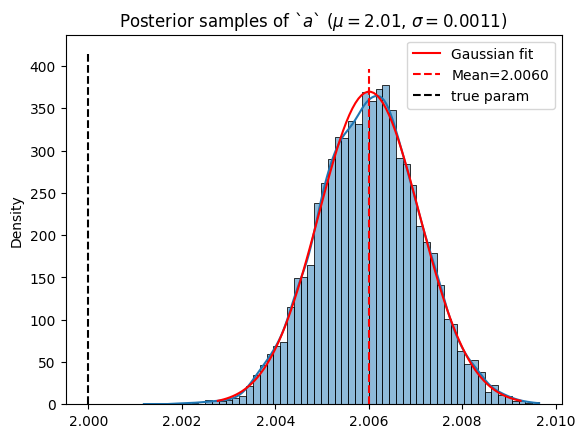

In [203]:
a_true = 2.00
k = 1
n = 1000
xmin = -5
xmax = 5
rng_key = jax.random.PRNGKey(32)

x, y = generate_data(a_true, k, n, xmin, xmax, rng_key)

# MCMC
nuts_kernel = NUTS(model)
mcmc = MCMC(nuts_kernel, num_warmup=500, num_samples=2000, num_chains=4)
mcmc.run(rng_key, x, y, k, itemp=100)
samples = mcmc.get_samples()

# Plot posterior samples
fig, ax = plt.subplots(1, 1)
plot_posterior(samples, ax, plot_gaussian=True)
ymin, ymax = ax.get_ylim()
ax.vlines([a_true], ymin=ymin, ymax=ymax, linestyle="dashed", color="black", label="true param")
ax.legend()